## Logistic Regression

- Instead of predicting exactly 0 or 1, **logistic** **regression** generates a probability, a value between 0 and 1,exclusive.
- Consider logistic regression model for spam detection.
  - If the model infers a value of 0.932, on a particular email message, it implies a 93.2% probability of email message being spam.
    - More precisely , it means that in the limit of infinite training examples, the set of  examples for which the model predicts 0.932 will actually be spam 93.2% of the time and the remaining 6.8% will not.
    
- **probability** **estimates** are calibrated
  - for example,$P$(house will sell)$*$price = expected outcome
- Regularization is extremely important for logistic regression
  - asymptotes of $log$**loss**
  - it will keep trying to drive loss to 0 in high dimensions
- two strategies are especially useful:
  - $L_{2}$**regularization**(aka $L_{2}$ weight decay) - penalizes huge weights
  - **Early** **stopping** - limiting training steps or learning rate

- Linear logistic regression is extremely efficient.
  - very fast training and prediction times
  - Short/wide models use a lot of RAM
  - of we need non-linearities, we can get them by adding in **feature** **cross** **products**

### Logistic Regression: Calculating a Probability 

Many problems require a probability estimate as output. Logistic regression is an extremely efficient mechanism for calculating probabilities. Practically speaking, you can use the returned probability in either of the following two ways:
  - "As is"
  - Converted to a binary category
  
Let's consider how we might use the probability "as is." Suppose we create a logistic regression model to predict the probability that a dog will bark during the middle of the night. We'll call that probability:

$P(bark\mid night)$

If the logistic regression model predicts a $P(bark\mid night)$ of 0.05, then over a year, the dog's owners should be startled awake approximately 18 times:

startled = $P(bark\mid night)$ * nights

18 ~= 0.05 * 365

In many cases, you'll map the logistic regression output into the solution to a binary classification problem, in which the goal is to correctly predict one of two possible labels (e.g., "spam" or "not spam").

You might be wondering how a logistic regression model can ensure output that always falls between 0 and 1. As it happens, a sigmoid function, defined as follows, produces output having those same characteristics:

$$y = \frac{1}{1 + e^{-z}}$$

The sigmoid function yields the following plot:

<img src="google_ml_img\SigmoidFunction.png" />


If z represents the output of the linear layer of a model trained with logistic regression, then sigmoid(z) will yield a value (a probability) between 0 and 1. In mathematical terms:

$$y' = \frac{1}{1 + e^{-(z)}}$$

where:

- y' is the output of the logistic regression model for a particular example.
- z is b + w1x1 + w2x2 + ... wNxN
  - The w values are the model's learned weights and bias.
  - The x values are the feature values for a particular example.

Note that z is also referred to as the log-odds because the inverse of the sigmoid states that z can be defined as the log of the probability of the "1" label (e.g., "dog barks") divided by the probability of the "0" label (e.g., "dog doesn't bark")

$$z = log(\frac{y}{1-y})$$

**sigmoid function with ML labels**

<img src="google_ml_img\LogisticRegressionOutput.svg" />

### Loss function for Logistic Regression

The loss function for linear regression is squared loss. The loss function for logistic regression is **Log Loss**, which is defined as follows:

$$\text{Log Loss} = \sum_{(x,y)\in D} -y\log(y') - (1 - y)\log(1 - y')$$


where:

- $(x,y)\in D$ is the data set containing many labeled examples, which are $(x,y)$ pairs
- $y$ is the label in a labeled example. Since this is logistic regression, every value of $y$ must either be 0 or 1. 
- $y'$  is the predicted value (somewhere between 0 and 1), given the set of features in $x$

The equation for Log Loss is closely related to Shannon's Entropy measure from Information Theory. It is also the negative logarithm of the likelihood function, assuming a Bernoulli distribution of . Indeed, minimizing the loss function yields a maximum likelihood estimate.


#### Regularization in Logistic Regression

Regularization is extremely important in logistic regression modeling. Without regularization, the asymptotic nature of logistic regression would keep driving loss towards 0 in high dimensions. Consequently, most logistic regression models use one of the following two strategies to dampen model complexity:
  - L2 regularization.
  - Early stopping, that is, limiting the number of training steps or the learning rate.
  - there is also third strategy, L1 regularization

Imagine that you assign a unique id to each example, and map each id to its own feature. If you don't specify a regularization function, the model will become completely overfit. That's because the model would try to drive loss to zero on all examples and never get there, driving the weights for each indicator feature to +infinity or -infinity. This can happen in high dimensional data with feature crosses, when there’s a huge mass of rare crosses that happen only on one example each.

Fortunately, using L2 or early stopping will prevent this problem.


### Classification

- $y$ (target feature) is discrete value
- Examples:
  - Email:Spam/not Spam ?
  - Online Transactions: fradulent(yes/no) ?
  - Tumor: Malignant/Benign ?
  
- Variable in these problems is y
  - $y \in \{0,1\}$
    - 0: "Negative class"(e.g., benign tumor) = absence of something
    - 1: "Positive class" (e.g., malignant tumor) = presence of something
    - can be multiclass i.e. $y \in \{0,1,2,3\}$

#### Logistic regression model
- **Logistic regression is a classification algorithm**

Want $0\leq H_{\theta(x)}\leq 1$

linear regression -> $h_\theta(x) = \theta^{T}x$

logistic regresion -> $h_\theta(x) = g(\theta^{T}x)$

### $g(z)$ =  Sigmoid function = Logistic function


<font size = '4'>
    
$g(z) = \frac{1}{1+e^{-z}}=\frac{e^{x}}{e^{x}+1}$ </font>


<font size = '4'>


$h_{\theta}(x) = \frac{1}{1+e^{-\theta^{Tx}}}$</font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid():
    x = np.arange(-6,6,0.001)
    log_f = lambda x : 1/(1+np.exp(-x))
    y = log_f(x)
    fig,ax = plt.subplots()
    plt.yticks(np.arange(0.0,1.1,0.1))
    ax.plot(x,y,label = 'z')
    plt.text(2,0.8, 'z',fontsize = 20)
    ax.grid()
sigmoid()

### Interpretation of hypothesis output

- when our hypothesis $h_{\theta(x)}$ outputs a number, we treat that value as the estimated probability that y=1 on input $x$
  - $h_{\theta}(x)=$ estimated probability that $y=1$ on input x
  - If $X$ is a feature vector with $x_{0}$ = 1 (as always) and $x_{1}$ = tumourSize
  - $h_{\theta(x)}= 0.7$
    - patient has 70% chance of a tumour being malignant

- can be written in following notation
  - $h_{\theta}(x)=P(y=1\mid x;\theta)$ 
    - what does this mean ?
      - (probability that $y=1$, given $x$, parameterized by $\theta$)
   

**Since this is a binary classification task we know y = 0 or 1**  

- $P(y=0\mid x;\theta)+P(y=1\mid x;\theta) = 1$

- $P(y=0\mid x;\theta)=1- P(y=1\mid x;\theta)$ 

### Decision Boundary

- Can be linear or non-linear

Suppose:
- when the probability of $y$ being 1 is greater than 0.5 , we can predict $y=1$
  - predict "$y=1$" if $h_{\theta}(x)\geq 0.5$
    - $g(z) \geq 0.5$ when $z\geq 0$
        - $h_{\theta}(x) = g(\theta^{T}x) \geq 0.5$, whenever $\theta^{T}x\geq 0$
  - when is it exactly that $h_{\theta}(x)$ is greater than 0.5 ?
    - lets look at sigmoid function
      - $g(z)$ is greater than or equal to 0.5 when z is greater than or equal to 0
    - if $z$ is positive, $g(z)$ is greater than 0.5
      - $z = (\theta^{T}x)$
    - so when
      - $\theta^{T}x \geq 0$
    - then
      - then $h_{\theta} \geq 0.5$
    
    
  - predict "$y=0$" if $h_{\theta}(x)< 0.5$
    - $g(z) < 0.5$ when $z < 0$
        - $h_{\theta}(x) = g(\theta^{T}x) <0.5$, whenever $\theta^{T}x < 0$ 

Decision boundary is defined by parameter vector $\theta$


#### Decision Boundary

$h_{\theta}(x)=g(\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2})$

- for example
  - $\theta_{0} = -3$
  - $\theta_{1} = 1$
  - $\theta_{2} = 1$
- our parameter vector is column vector with the above values
  - $\theta^{T}$ is row vector $=  [-3,1,1]$
- what does that mean ?
  - z becomes $\theta^{T}x$
  - we predict $y=1$ if:
    - $-3x_{0}+1x_{1}+1x_{2}\geq 0$
    - $-3+x_{1}+x_{2}\geq 0$
- we can rewrite as :
  - if $(x_{1}+x_{2})\geq 3$ , we predict y = 1
  - if we plot
    - $(x_{1}+x_{2})= 3$, we graphically plot our decision boundary
- Means we have these two regions on the graph
  - Blue = false
  - Magenta = true
  - Line = decision boundary
    - the straight line is the set of points where $h_{\theta}(x) = 0.5$ exactly
  - decision boundary is property of hypothesis
    - means that we can create the boundary with hypothesis and parameters, without any data
    - later, we use data to determine the parameter values
  
  
  

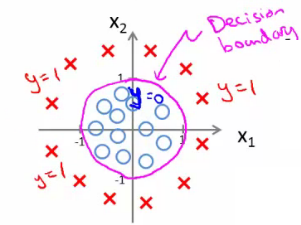

<img src='images\dec_bound2.png'>


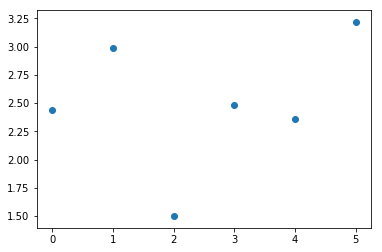

In [2]:
x1 = np.array([0,1,2,3,4,5])
x2 = np.random.uniform(low=1, high=3.5, size=(6,))

fig,ax = plt.subplots()
ax.scatter(x1,x2)


#### Non-Linear decision boundary
- Let`s have $h_{\theta}(x)=g(\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+\theta_{3}x_{1}+\theta_{4}x_{2})$
  - We take the transpose of the $\theta$ vector times the input vector
  - Say $\theta^{T}$ was $[-1,0,0,1,]$
      - Predict that $y=1$ if
        - $-1+x_{1}^{2}+x_{2}^{2}\geq 0$
        - or
        - $x_{1}^{2}+x_{2}^{2}\geq 0$
        - Plotting $x_{1}^{2}+x_{2}^{2}=1$ gives us a circle with radius 1 around 0

<img src = 'images\dec_boundary_circle.png'>

- It means that we can build more complex decision boundaries by fitting complex parameters this relatively simple hypothesis
- How to get more complex decision boundaries ?
   - By using higher order polynomial terms, we can get even more complex decision boundaries
<img src = 'images\dec_boundary_swamp.png'>


### Cost function for logistic regression

$Cost(h_{\theta}(x),y)=$

$-log(h_{\theta}(x))\:$   if   $\:\:y=1$

$-log(1-h_{\theta}(x))\:$   if   $\:\:y=0$

**Properties**

$Cost=0$ if $y=1,$ $h_{\theta}(x)=1$

But as 

$h_{\theta}(x)\: ->0$

$Cost\: -> \infty$

### Simplified cost function


$$Cost(h_{\theta(x),y}=-y\log(h_{\theta}(x))-(1-y)log(1-h_{\theta}(x)$$


$$J(\theta)=\frac{1}{m}\sum_{i=1}^{m}Cost(h_{\theta}(x^{i},y^{i})$$

$$=-\frac{1}{m}[\sum_{i=1}^{m}y^{(i)}\log h_{\theta}(x^{(i}))+(1-y^{i})\log(1-h_{\theta}(x^{(i)}))]$$

Maximum likelihood estimation ????

###  Batch Gradient Descent 

$$J(\theta)=-\frac{1}{m}[\sum_{i=1}^{m}y^{(i)}\log h_{\theta}(x^{(i}))+(1-y^{i})\log(1-h_{\theta}(x^{(i)}))]$$

Want to $min\:J(\theta):$

Repeat:

$$\theta_{j} := \theta{j}-\alpha\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})\:x_{j}^{(i)}$$

simultaneously update all   $\theta{j}$